In [1]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import re
import json
from typing import Dict, List, Tuple, Any
from dataclasses import dataclass
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
@dataclass
class SystemComponent:
    """Represents a component in a three-tier system."""
    name: str
    tier: str  # 'presentation', 'business', 'data'
    technology: str
    code: str
    config: str
    patterns: List[str]
    dependencies: List[str]

@dataclass
class ThreeTierSystem:
    """Represents a complete three-tier system."""
    name: str
    description: str
    components: List[SystemComponent]
    architecture_decisions: List[str]
    tech_stack: Dict[str, str]

print("Data structures defined!")


Data structures defined!


In [3]:
def generate_mock_systems() -> List[ThreeTierSystem]:
    """Generate mock three-tier system implementations with different approaches."""
    
    # System 1: Modern React + Node.js + PostgreSQL
    system1_components = [
        SystemComponent(
            name="React Frontend",
            tier="presentation",
            technology="React",
            code="""
import React, { useState, useEffect } from 'react';
import axios from 'axios';

const UserDashboard = () => {
    const [users, setUsers] = useState([]);
    const [loading, setLoading] = useState(true);
    
    useEffect(() => {
        const fetchUsers = async () => {
            try {
                const response = await axios.get('/api/users');
                setUsers(response.data);
            } catch (error) {
                console.error('Error fetching users:', error);
            } finally {
                setLoading(false);
            }
        };
        fetchUsers();
    }, []);
    
    return (
        <div className="dashboard">
            <h1>User Dashboard</h1>
            {loading ? <div>Loading...</div> : 
                <div className="user-grid">
                    {users.map(user => (
                        <UserCard key={user.id} user={user} />
                    ))}
                </div>
            }
        </div>
    );
};
            """,
            config="""{
    "scripts": {
        "start": "react-scripts start",
        "build": "react-scripts build"
    },
    "dependencies": {
        "react": "^18.0.0",
        "axios": "^0.27.0",
        "styled-components": "^5.3.0"
    }
}""",
            patterns=["Component-Based Architecture", "Hooks Pattern", "Async/Await", "Error Boundaries"],
            dependencies=["axios", "react-router"]
        ),
        SystemComponent(
            name="Express API",
            tier="business",
            technology="Node.js/Express",
            code="""
const express = require('express');
const { Pool } = require('pg');
const cors = require('cors');

const app = express();
const pool = new Pool({
    connectionString: process.env.DATABASE_URL
});

app.use(cors());
app.use(express.json());

// User routes
app.get('/api/users', async (req, res) => {
    try {
        const result = await pool.query('SELECT * FROM users ORDER BY created_at DESC');
        res.json(result.rows);
    } catch (err) {
        console.error(err);
        res.status(500).json({ error: 'Internal server error' });
    }
});

app.post('/api/users', async (req, res) => {
    const { name, email } = req.body;
    try {
        const result = await pool.query(
            'INSERT INTO users (name, email) VALUES ($1, $2) RETURNING *',
            [name, email]
        );
        res.status(201).json(result.rows[0]);
    } catch (err) {
        console.error(err);
        res.status(500).json({ error: 'Failed to create user' });
    }
});

module.exports = app;
            """,
            config="""{
    "dependencies": {
        "express": "^4.18.0",
        "pg": "^8.7.0",
        "cors": "^2.8.5",
        "helmet": "^5.1.0"
    }
}""",
            patterns=["RESTful API", "MVC Pattern", "Connection Pooling", "Error Handling Middleware"],
            dependencies=["pg", "express", "cors"]
        ),
        SystemComponent(
            name="PostgreSQL Database",
            tier="data",
            technology="PostgreSQL",
            code="""
-- Users table schema
CREATE TABLE users (
    id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    email VARCHAR(255) UNIQUE NOT NULL,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    updated_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

-- Indexes for performance
CREATE INDEX idx_users_email ON users(email);
CREATE INDEX idx_users_created_at ON users(created_at);

-- Trigger for updated_at
CREATE OR REPLACE FUNCTION update_updated_at_column()
RETURNS TRIGGER AS $$
BEGIN
    NEW.updated_at = CURRENT_TIMESTAMP;
    RETURN NEW;
END;
$$ language 'plpgsql';

CREATE TRIGGER update_users_updated_at 
    BEFORE UPDATE ON users 
    FOR EACH ROW 
    EXECUTE FUNCTION update_updated_at_column();
            """,
            config="""{
    "database": "userapp",
    "host": "localhost",
    "port": 5432,
    "ssl": false,
    "pool": {
        "min": 2,
        "max": 10
    }
}""",
            patterns=["Relational Database", "ACID Compliance", "Indexing Strategy", "Triggers"],
            dependencies=[]
        )
    ]
    
    system1 = ThreeTierSystem(
        name="Modern Web App",
        description="React frontend with Node.js API and PostgreSQL database",
        components=system1_components,
        architecture_decisions=[
            "Single Page Application (SPA) architecture",
            "RESTful API design",
            "Relational database with ACID properties",
            "Stateless backend services",
            "Component-based frontend architecture"
        ],
        tech_stack={
            "frontend": "React",
            "backend": "Node.js/Express",
            "database": "PostgreSQL",
            "deployment": "Docker"
        }
    )
    
    return [system1]

# Generate initial system
mock_systems = generate_mock_systems()
print(f"Generated {len(mock_systems)} mock systems")
print(f"System 1: {mock_systems[0].name}")
print(f"Components: {[c.name for c in mock_systems[0].components]}")


Generated 1 mock systems
System 1: Modern Web App
Components: ['React Frontend', 'Express API', 'PostgreSQL Database']


In [4]:
# Add a second system with different architecture for comparison
def add_microservices_system():
    """Add a microservices-based system for comparison."""
    
    # System 2: Vue.js + Python Flask + MongoDB (Microservices)
    system2_components = [
        SystemComponent(
            name="Vue.js Frontend",
            tier="presentation",
            technology="Vue.js",
            code="""
<template>
  <div class="user-management">
    <h1>User Management</h1>
    <div v-if="loading" class="loader">Loading...</div>
    <div v-else>
      <user-form @user-created="fetchUsers" />
      <user-table :users="users" @user-updated="fetchUsers" />
    </div>
  </div>
</template>

<script>
import { ref, onMounted } from 'vue'
import userService from '@/services/userService'

export default {
  name: 'UserManagement',
  setup() {
    const users = ref([])
    const loading = ref(true)
    
    const fetchUsers = async () => {
      try {
        loading.value = true
        const response = await userService.getUsers()
        users.value = response.data
      } catch (error) {
        console.error('Failed to fetch users:', error)
      } finally {
        loading.value = false
      }
    }
    
    onMounted(() => {
      fetchUsers()
    })
    
    return {
      users,
      loading,
      fetchUsers
    }
  }
}
</script>
            """,
            config="""{
  "dependencies": {
    "vue": "^3.2.0",
    "vue-router": "^4.0.0",
    "vuex": "^4.0.0",
    "axios": "^0.27.0"
  },
  "devDependencies": {
    "@vue/cli-service": "^5.0.0"
  }
}""",
            patterns=["Composition API", "Single File Components", "Reactive Data", "Service Layer"],
            dependencies=["vue-router", "vuex", "axios"]
        ),
        SystemComponent(
            name="Flask User Service",
            tier="business",
            technology="Python/Flask",
            code="""
from flask import Flask, request, jsonify
from flask_pymongo import PyMongo
from bson.objectid import ObjectId
from datetime import datetime
import os

app = Flask(__name__)
app.config["MONGO_URI"] = os.getenv("MONGO_URI", "mongodb://localhost:27017/userdb")
mongo = PyMongo(app)

@app.route('/api/users', methods=['GET'])
def get_users():
    try:
        users = list(mongo.db.users.find().sort("created_at", -1))
        for user in users:
            user['_id'] = str(user['_id'])
        return jsonify(users), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500

@app.route('/api/users', methods=['POST'])
def create_user():
    try:
        data = request.get_json()
        user = {
            "name": data.get("name"),
            "email": data.get("email"),
            "created_at": datetime.utcnow(),
            "updated_at": datetime.utcnow()
        }
        result = mongo.db.users.insert_one(user)
        user['_id'] = str(result.inserted_id)
        return jsonify(user), 201
    except Exception as e:
        return jsonify({"error": str(e)}), 500

@app.route('/api/users/<user_id>', methods=['PUT'])
def update_user(user_id):
    try:
        data = request.get_json()
        update_data = {
            "name": data.get("name"),
            "email": data.get("email"),
            "updated_at": datetime.utcnow()
        }
        mongo.db.users.update_one(
            {"_id": ObjectId(user_id)},
            {"$set": update_data}
        )
        return jsonify({"message": "User updated successfully"}), 200
    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, port=5001)
            """,
            config="""{
  "dependencies": {
    "Flask": "2.0.1",
    "Flask-PyMongo": "2.3.0",
    "python-dotenv": "0.19.0"
  },
  "environment": {
    "FLASK_ENV": "development",
    "MONGO_URI": "mongodb://localhost:27017/userdb"
  }
}""",
            patterns=["Microservices", "Document-based Storage", "RESTful API", "Dependency Injection"],
            dependencies=["flask", "pymongo", "python-dotenv"]
        ),
        SystemComponent(
            name="MongoDB Database",
            tier="data",
            technology="MongoDB",
            code="""
// User collection schema (flexible document structure)
{
  "_id": ObjectId,
  "name": String,
  "email": String,
  "created_at": Date,
  "updated_at": Date,
  "profile": {
    "avatar": String,
    "bio": String,
    "preferences": {
      "notifications": Boolean,
      "theme": String
    }
  },
  "metadata": {
    "ip_address": String,
    "user_agent": String,
    "last_login": Date
  }
}

// Indexes for performance
db.users.createIndex({ "email": 1 }, { unique: true })
db.users.createIndex({ "created_at": -1 })
db.users.createIndex({ "name": "text", "profile.bio": "text" })

// Aggregation pipeline for user analytics
db.users.aggregate([
  {
    $group: {
      _id: {
        $dateToString: { format: "%Y-%m-%d", date: "$created_at" }
      },
      count: { $sum: 1 }
    }
  },
  { $sort: { "_id": 1 } }
])
            """,
            config="""{
  "database": "userdb",
  "host": "localhost",
  "port": 27017,
  "options": {
    "useNewUrlParser": true,
    "useUnifiedTopology": true
  },
  "indexes": [
    { "fields": { "email": 1 }, "options": { "unique": true } },
    { "fields": { "created_at": -1 } }
  ]
}""",
            patterns=["Document Database", "Flexible Schema", "Aggregation Pipeline", "Text Search"],
            dependencies=[]
        )
    ]
    
    system2 = ThreeTierSystem(
        name="Microservices Web App",
        description="Vue.js frontend with Python Flask microservices and MongoDB",
        components=system2_components,
        architecture_decisions=[
            "Microservices architecture",
            "Document-based data storage",
            "Service-oriented design",
            "Flexible schema approach",
            "Composition API frontend pattern"
        ],
        tech_stack={
            "frontend": "Vue.js",
            "backend": "Python/Flask",
            "database": "MongoDB",
            "deployment": "Kubernetes"
        }
    )
    
    return system2

# Add the second system
system2 = add_microservices_system()
mock_systems.append(system2)

print(f"Total systems: {len(mock_systems)}")
for i, system in enumerate(mock_systems):
    print(f"System {i+1}: {system.name} - {system.description}")


Total systems: 2
System 1: Modern Web App - React frontend with Node.js API and PostgreSQL database
System 2: Microservices Web App - Vue.js frontend with Python Flask microservices and MongoDB


In [5]:
class DesignDecisionExtractor:
    """Extract design decisions from code and configurations using NLP."""
    
    def __init__(self):
        # Initialize sentence transformer for semantic analysis
        self.sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
        
        # Technology patterns to identify
        self.tech_patterns = {
            'async_patterns': ['async', 'await', 'Promise', 'Observable', 'asyncio'],
            'database_patterns': ['SELECT', 'INSERT', 'UPDATE', 'CREATE TABLE', 'find()', 'aggregate'],
            'api_patterns': ['@app.route', 'app.get', 'app.post', 'REST', 'GraphQL'],
            'component_patterns': ['component', 'Component', 'template', 'render'],
            'error_handling': ['try', 'catch', 'except', 'throw', 'error'],
            'security_patterns': ['auth', 'cors', 'helmet', 'jwt', 'session'],
            'performance_patterns': ['index', 'cache', 'pool', 'lazy', 'optimization']
        }
        
        # Architecture patterns
        self.architecture_patterns = {
            'mvc': ['model', 'view', 'controller', 'MVC'],
            'microservices': ['service', 'microservice', 'API gateway', 'service mesh'],
            'layered': ['presentation', 'business', 'data', 'layer'],
            'event_driven': ['event', 'listener', 'observer', 'publish', 'subscribe'],
            'reactive': ['reactive', 'stream', 'observer', 'reactive programming']
        }
    
    def extract_code_features(self, code: str) -> Dict[str, Any]:
        """Extract features from source code."""
        features = {
            'technologies': [],
            'patterns': [],
            'complexity_indicators': {},
            'semantic_features': []
        }
        
        # Technology detection
        for tech_type, keywords in self.tech_patterns.items():
            matches = sum(1 for keyword in keywords if keyword.lower() in code.lower())
            if matches > 0:
                features['technologies'].append({
                    'type': tech_type,
                    'matches': matches,
                    'keywords': [kw for kw in keywords if kw.lower() in code.lower()]
                })
        
        # Code complexity indicators
        features['complexity_indicators'] = {
            'lines_of_code': len(code.split('\n')),
            'function_count': len(re.findall(r'def |function |const .* = |=> ', code)),
            'class_count': len(re.findall(r'class |@Component', code)),
            'import_count': len(re.findall(r'import |require\(|from .* import', code)),
            'comment_ratio': len(re.findall(r'//|#|/\*|\*/', code)) / max(len(code.split('\n')), 1)
        }
        
        # Extract semantic features using sentence transformer
        code_sentences = self.extract_meaningful_sentences(code)
        if code_sentences:
            embeddings = self.sentence_model.encode(code_sentences)
            features['semantic_features'] = embeddings.mean(axis=0).tolist()
        
        return features
    
    def extract_meaningful_sentences(self, code: str) -> List[str]:
        """Extract meaningful sentences from code (comments, function names, etc.)."""
        sentences = []
        
        # Extract comments
        comments = re.findall(r'//.*|#.*|/\*.*?\*/', code, re.DOTALL)
        sentences.extend([c.strip('/*#/ ') for c in comments if len(c.strip()) > 10])
        
        # Extract function/method names and convert to readable text
        functions = re.findall(r'(?:def|function|const)\s+(\w+)', code)
        for func in functions:
            # Convert camelCase/snake_case to readable text
            readable = re.sub(r'([A-Z])', r' \1', func).replace('_', ' ').strip()
            sentences.append(f"Function {readable}")
        
        # Extract class names
        classes = re.findall(r'class\s+(\w+)', code)
        for cls in classes:
            readable = re.sub(r'([A-Z])', r' \1', cls).strip()
            sentences.append(f"Class {readable}")
        
        return sentences
    
    def extract_config_features(self, config: str) -> Dict[str, Any]:
        """Extract features from configuration files."""
        features = {
            'dependencies': [],
            'environment_vars': [],
            'database_config': {},
            'deployment_config': {}
        }
        
        try:
            # Try to parse as JSON
            config_data = json.loads(config)
            
            # Extract dependencies
            if 'dependencies' in config_data:
                features['dependencies'] = list(config_data['dependencies'].keys())
            
            # Extract environment configuration
            if 'environment' in config_data:
                features['environment_vars'] = list(config_data['environment'].keys())
            
            # Extract database configuration
            if any(key in config_data for key in ['database', 'db', 'mongo', 'postgres']):
                features['database_config'] = {
                    k: v for k, v in config_data.items() 
                    if k in ['database', 'host', 'port', 'ssl', 'pool']
                }
                
        except json.JSONDecodeError:
            # If not JSON, extract key patterns from text
            features['dependencies'] = re.findall(r'"([^"]+)":\s*"[^"]+"', config)
            features['environment_vars'] = re.findall(r'([A-Z_]+)=', config)
        
        return features
    
    def analyze_system(self, system: ThreeTierSystem) -> Dict[str, Any]:
        """Analyze a complete system and extract design decisions."""
        analysis = {
            'system_name': system.name,
            'description': system.description,
            'components': [],
            'overall_features': {
                'tech_stack': system.tech_stack,
                'architecture_decisions': system.architecture_decisions,
                'design_patterns': []
            }
        }
        
        all_patterns = []
        all_technologies = []
        
        # Analyze each component
        for component in system.components:
            comp_analysis = {
                'name': component.name,
                'tier': component.tier,
                'technology': component.technology,
                'code_features': self.extract_code_features(component.code),
                'config_features': self.extract_config_features(component.config),
                'patterns': component.patterns,
                'dependencies': component.dependencies
            }
            
            analysis['components'].append(comp_analysis)
            all_patterns.extend(component.patterns)
            all_technologies.extend([f['type'] for f in comp_analysis['code_features']['technologies']])
        
        # Aggregate overall patterns
        analysis['overall_features']['design_patterns'] = list(set(all_patterns))
        analysis['overall_features']['technology_types'] = list(set(all_technologies))
        
        return analysis

# Initialize extractor and analyze systems
extractor = DesignDecisionExtractor()

print("Analyzing systems...")
system_analyses = []
for system in mock_systems:
    analysis = extractor.analyze_system(system)
    system_analyses.append(analysis)
    print(f"✅ Analyzed {system.name}")

print(f"\nCompleted analysis of {len(system_analyses)} systems")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Analyzing systems...
✅ Analyzed Modern Web App
✅ Analyzed Microservices Web App

Completed analysis of 2 systems


In [6]:
class SystemGraphBuilder:
    """Build graph representations of systems."""
    
    def build_system_graph(self, analysis: Dict[str, Any]) -> nx.Graph:
        """Build a graph representation of a system."""
        G = nx.Graph()
        
        # Add system node
        system_name = analysis['system_name']
        G.add_node(system_name, 
                  type='system',
                  description=analysis['description'])
        
        # Add component nodes and edges
        for comp in analysis['components']:
            comp_name = comp['name']
            G.add_node(comp_name,
                      type='component',
                      tier=comp['tier'],
                      technology=comp['technology'],
                      patterns=comp['patterns'],
                      complexity=comp['code_features']['complexity_indicators']['lines_of_code'])
            
            # Connect system to component
            G.add_edge(system_name, comp_name, relationship='contains')
            
            # Add technology nodes
            tech_name = f"tech_{comp['technology']}"
            if not G.has_node(tech_name):
                G.add_node(tech_name, type='technology', name=comp['technology'])
            G.add_edge(comp_name, tech_name, relationship='uses')
            
            # Add pattern nodes
            for pattern in comp['patterns']:
                pattern_name = f"pattern_{pattern.replace(' ', '_')}"
                if not G.has_node(pattern_name):
                    G.add_node(pattern_name, type='pattern', name=pattern)
                G.add_edge(comp_name, pattern_name, relationship='implements')
            
            # Add dependency edges
            for dep in comp['dependencies']:
                dep_name = f"dep_{dep}"
                if not G.has_node(dep_name):
                    G.add_node(dep_name, type='dependency', name=dep)
                G.add_edge(comp_name, dep_name, relationship='depends_on')
        
        # Add tier relationships
        tiers = {'presentation': [], 'business': [], 'data': []}
        for comp in analysis['components']:
            tiers[comp['tier']].append(comp['name'])
        
        # Connect components in sequence (presentation -> business -> data)
        tier_order = ['presentation', 'business', 'data']
        for i in range(len(tier_order) - 1):
            current_tier = tier_order[i]
            next_tier = tier_order[i + 1]
            
            for current_comp in tiers[current_tier]:
                for next_comp in tiers[next_tier]:
                    if G.has_node(current_comp) and G.has_node(next_comp):
                        G.add_edge(current_comp, next_comp, relationship='communicates_with')
        
        return G
    
    def calculate_graph_metrics(self, graph: nx.Graph) -> Dict[str, float]:
        """Calculate various graph metrics."""
        metrics = {}
        
        # Basic metrics
        metrics['nodes'] = graph.number_of_nodes()
        metrics['edges'] = graph.number_of_edges()
        metrics['density'] = nx.density(graph)
        
        # Centrality measures
        if graph.number_of_nodes() > 0:
            betweenness = nx.betweenness_centrality(graph)
            closeness = nx.closeness_centrality(graph)
            degree = nx.degree_centrality(graph)
            
            metrics['avg_betweenness'] = np.mean(list(betweenness.values()))
            metrics['avg_closeness'] = np.mean(list(closeness.values()))
            metrics['avg_degree'] = np.mean(list(degree.values()))
            
            # Component-specific metrics
            components_by_type = {}
            for node, data in graph.nodes(data=True):
                node_type = data.get('type', 'unknown')
                if node_type not in components_by_type:
                    components_by_type[node_type] = 0
                components_by_type[node_type] += 1
            
            metrics['node_type_distribution'] = components_by_type
        
        return metrics

# Build graphs for all systems
graph_builder = SystemGraphBuilder()
system_graphs = []
graph_metrics = []

print("Building graph representations...")
for analysis in system_analyses:
    graph = graph_builder.build_system_graph(analysis)
    metrics = graph_builder.calculate_graph_metrics(graph)
    
    system_graphs.append(graph)
    graph_metrics.append(metrics)
    
    print(f"✅ Built graph for {analysis['system_name']}")
    print(f"   Nodes: {metrics['nodes']}, Edges: {metrics['edges']}, Density: {metrics['density']:.3f}")

print(f"\nCompleted graph building for {len(system_graphs)} systems")


Building graph representations...
✅ Built graph for Modern Web App
   Nodes: 24, Edges: 25, Density: 0.091
✅ Built graph for Microservices Web App
   Nodes: 25, Edges: 26, Density: 0.087

Completed graph building for 2 systems


In [7]:
class SystemVectorBuilder:
    """Build vector representations of systems."""
    
    def __init__(self):
        self.sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
        self.tfidf = TfidfVectorizer(max_features=100, stop_words='english')
    
    def build_system_vector(self, analysis: Dict[str, Any]) -> np.ndarray:
        """Build a comprehensive vector representation of a system."""
        
        # 1. Text-based features using embeddings
        text_features = self.extract_text_features(analysis)
        text_embedding = self.sentence_model.encode([text_features]).flatten()
        
        # 2. Categorical features (one-hot encoded)
        categorical_features = self.extract_categorical_features(analysis)
        
        # 3. Numerical features
        numerical_features = self.extract_numerical_features(analysis)
        
        # 4. Pattern-based features
        pattern_features = self.extract_pattern_features(analysis)
        
        # Combine all features
        combined_vector = np.concatenate([
            text_embedding,           # 384 dimensions (sentence transformer)
            categorical_features,     # Variable dimensions
            numerical_features,       # ~10 dimensions
            pattern_features         # ~20 dimensions
        ])
        
        return combined_vector
    
    def extract_text_features(self, analysis: Dict[str, Any]) -> str:
        """Extract textual features for embedding."""
        text_parts = []
        
        # System description
        text_parts.append(analysis['description'])
        
        # Architecture decisions
        text_parts.extend(analysis['overall_features']['architecture_decisions'])
        
        # Technology stack
        for tech in analysis['overall_features']['tech_stack'].values():
            text_parts.append(f"Technology {tech}")
        
        # Design patterns
        for pattern in analysis['overall_features']['design_patterns']:
            text_parts.append(f"Pattern {pattern}")
        
        # Component descriptions
        for comp in analysis['components']:
            text_parts.append(f"{comp['tier']} tier uses {comp['technology']}")
            text_parts.extend([f"Pattern {p}" for p in comp['patterns']])
        
        return ' '.join(text_parts)
    
    def extract_categorical_features(self, analysis: Dict[str, Any]) -> np.ndarray:
        """Extract categorical features with one-hot encoding."""
        
        # Define known categories
        known_technologies = ['React', 'Vue.js', 'Node.js/Express', 'Python/Flask', 'PostgreSQL', 'MongoDB']
        known_patterns = ['Component-Based Architecture', 'Hooks Pattern', 'RESTful API', 'MVC Pattern', 
                         'Microservices', 'Document-based Storage', 'Composition API']
        known_tiers = ['presentation', 'business', 'data']
        
        features = []
        
        # Technology one-hot encoding
        tech_vector = np.zeros(len(known_technologies))
        for i, tech in enumerate(known_technologies):
            if any(tech in str(comp['technology']) for comp in analysis['components']):
                tech_vector[i] = 1
        features.extend(tech_vector)
        
        # Pattern one-hot encoding
        pattern_vector = np.zeros(len(known_patterns))
        all_patterns = analysis['overall_features']['design_patterns']
        for i, pattern in enumerate(known_patterns):
            if pattern in all_patterns:
                pattern_vector[i] = 1
        features.extend(pattern_vector)
        
        # Tier completeness
        tier_vector = np.zeros(len(known_tiers))
        component_tiers = [comp['tier'] for comp in analysis['components']]
        for i, tier in enumerate(known_tiers):
            if tier in component_tiers:
                tier_vector[i] = 1
        features.extend(tier_vector)
        
        return np.array(features)
    
    def extract_numerical_features(self, analysis: Dict[str, Any]) -> np.ndarray:
        """Extract numerical features."""
        features = []
        
        # System-level metrics
        features.append(len(analysis['components']))  # Number of components
        features.append(len(analysis['overall_features']['tech_stack']))  # Tech stack diversity
        features.append(len(analysis['overall_features']['design_patterns']))  # Pattern count
        features.append(len(analysis['overall_features']['architecture_decisions']))  # Decision count
        
        # Component-level aggregations
        total_loc = sum(comp['code_features']['complexity_indicators']['lines_of_code'] 
                       for comp in analysis['components'])
        features.append(total_loc)  # Total lines of code
        
        avg_complexity = np.mean([comp['code_features']['complexity_indicators']['function_count'] 
                                 for comp in analysis['components']])
        features.append(avg_complexity)  # Average function count
        
        total_dependencies = sum(len(comp['dependencies']) for comp in analysis['components'])
        features.append(total_dependencies)  # Total dependencies
        
        # Technology diversity per tier
        tier_tech_diversity = {}
        for comp in analysis['components']:
            tier = comp['tier']
            if tier not in tier_tech_diversity:
                tier_tech_diversity[tier] = set()
            tier_tech_diversity[tier].add(comp['technology'])
        
        for tier in ['presentation', 'business', 'data']:
            diversity = len(tier_tech_diversity.get(tier, set()))
            features.append(diversity)
        
        return np.array(features)
    
    def extract_pattern_features(self, analysis: Dict[str, Any]) -> np.ndarray:
        """Extract pattern-based features."""
        
        # Define pattern categories
        pattern_categories = {
            'architectural': ['MVC Pattern', 'Microservices', 'Component-Based Architecture'],
            'async': ['Async/Await', 'Promise', 'Observable'],
            'data': ['Document-based Storage', 'Relational Database', 'ACID Compliance'],
            'api': ['RESTful API', 'GraphQL', 'Error Handling Middleware'],
            'ui': ['Hooks Pattern', 'Composition API', 'Reactive Data'],
            'performance': ['Connection Pooling', 'Indexing Strategy', 'Caching']
        }
        
        features = []
        all_patterns = analysis['overall_features']['design_patterns']
        
        # Count patterns in each category
        for category, patterns in pattern_categories.items():
            count = sum(1 for pattern in patterns if pattern in all_patterns)
            features.append(count)
        
        # Additional pattern-based metrics
        features.append(len(set(all_patterns)))  # Unique patterns count
        
        # Pattern distribution across tiers
        tier_patterns = {'presentation': [], 'business': [], 'data': []}
        for comp in analysis['components']:
            tier_patterns[comp['tier']].extend(comp['patterns'])
        
        for tier in ['presentation', 'business', 'data']:
            features.append(len(set(tier_patterns[tier])))  # Patterns per tier
        
        return np.array(features)

# Build vectors for all systems
vector_builder = SystemVectorBuilder()
system_vectors = []

print("Building vector representations...")
for analysis in system_analyses:
    vector = vector_builder.build_system_vector(analysis)
    system_vectors.append(vector)
    print(f"✅ Built vector for {analysis['system_name']} (dimensions: {len(vector)})")

print(f"\nCompleted vector building for {len(system_vectors)} systems")
print(f"Vector dimensions: {len(system_vectors[0])}")


Building vector representations...
✅ Built vector for Modern Web App (dimensions: 420)
✅ Built vector for Microservices Web App (dimensions: 420)

Completed vector building for 2 systems
Vector dimensions: 420


In [8]:
class SimilarityAnalyzer:
    """Analyze similarity between systems using multiple approaches."""
    
    def graph_similarity(self, graph1: nx.Graph, graph2: nx.Graph) -> Dict[str, float]:
        """Calculate graph-based similarity metrics."""
        similarities = {}
        
        # Node overlap similarity
        nodes1 = set(graph1.nodes())
        nodes2 = set(graph2.nodes())
        node_overlap = len(nodes1.intersection(nodes2)) / len(nodes1.union(nodes2))
        similarities['node_overlap'] = node_overlap
        
        # Edge overlap similarity
        edges1 = set(graph1.edges())
        edges2 = set(graph2.edges())
        edge_overlap = len(edges1.intersection(edges2)) / max(len(edges1.union(edges2)), 1)
        similarities['edge_overlap'] = edge_overlap
        
        # Structure similarity (based on graph metrics)
        metrics1 = graph_builder.calculate_graph_metrics(graph1)
        metrics2 = graph_builder.calculate_graph_metrics(graph2)
        
        structural_sim = 1 - abs(metrics1['density'] - metrics2['density'])
        similarities['structural'] = max(0, structural_sim)
        
        # Node type distribution similarity
        dist1 = metrics1.get('node_type_distribution', {})
        dist2 = metrics2.get('node_type_distribution', {})
        
        all_types = set(dist1.keys()).union(set(dist2.keys()))
        type_similarity = 0
        for node_type in all_types:
            count1 = dist1.get(node_type, 0)
            count2 = dist2.get(node_type, 0)
            max_count = max(count1, count2)
            if max_count > 0:
                type_similarity += 1 - abs(count1 - count2) / max_count
        
        if all_types:
            similarities['node_type'] = type_similarity / len(all_types)
        else:
            similarities['node_type'] = 0
        
        # Overall graph similarity (weighted average)
        overall = (similarities['node_overlap'] * 0.3 + 
                  similarities['edge_overlap'] * 0.2 + 
                  similarities['structural'] * 0.2 + 
                  similarities['node_type'] * 0.3)
        similarities['overall'] = overall
        
        return similarities
    
    def vector_similarity(self, vector1: np.ndarray, vector2: np.ndarray) -> Dict[str, float]:
        """Calculate vector-based similarity metrics."""
        similarities = {}
        
        # Cosine similarity
        cosine_sim = cosine_similarity([vector1], [vector2])[0][0]
        similarities['cosine'] = cosine_sim
        
        # Euclidean similarity (normalized)
        euclidean_dist = np.linalg.norm(vector1 - vector2)
        max_possible_dist = np.linalg.norm(vector1) + np.linalg.norm(vector2)
        euclidean_sim = 1 - (euclidean_dist / max_possible_dist) if max_possible_dist > 0 else 0
        similarities['euclidean'] = euclidean_sim
        
        # Pearson correlation
        correlation = np.corrcoef(vector1, vector2)[0][1]
        similarities['correlation'] = correlation if not np.isnan(correlation) else 0
        
        # Overall vector similarity (weighted average)
        overall = (similarities['cosine'] * 0.5 + 
                  similarities['euclidean'] * 0.3 + 
                  abs(similarities['correlation']) * 0.2)
        similarities['overall'] = overall
        
        return similarities
    
    def comprehensive_similarity(self, system1_idx: int, system2_idx: int) -> Dict[str, Any]:
        """Calculate comprehensive similarity between two systems."""
        system1_name = system_analyses[system1_idx]['system_name']
        system2_name = system_analyses[system2_idx]['system_name']
        
        # Graph-based similarity
        graph_sim = self.graph_similarity(system_graphs[system1_idx], system_graphs[system2_idx])
        
        # Vector-based similarity
        vector_sim = self.vector_similarity(system_vectors[system1_idx], system_vectors[system2_idx])
        
        # Combined similarity score
        combined_score = (graph_sim['overall'] * 0.6 + vector_sim['overall'] * 0.4)
        
        return {
            'systems': (system1_name, system2_name),
            'graph_similarity': graph_sim,
            'vector_similarity': vector_sim,
            'combined_score': combined_score,
            'interpretation': self.interpret_similarity(combined_score)
        }
    
    def interpret_similarity(self, score: float) -> str:
        """Interpret similarity score."""
        if score >= 0.8:
            return "Very High Similarity - Nearly identical implementations"
        elif score >= 0.6:
            return "High Similarity - Similar approaches with minor differences"
        elif score >= 0.4:
            return "Moderate Similarity - Some shared patterns but different approaches"
        elif score >= 0.2:
            return "Low Similarity - Few shared elements"
        else:
            return "Very Low Similarity - Fundamentally different approaches"

# Analyze similarities between all system pairs
analyzer = SimilarityAnalyzer()
similarity_results = []

print("Computing similarity scores...")
for i in range(len(mock_systems)):
    for j in range(i + 1, len(mock_systems)):
        result = analyzer.comprehensive_similarity(i, j)
        similarity_results.append(result)
        
        print(f"\n🔍 Similarity Analysis: {result['systems'][0]} vs {result['systems'][1]}")
        print(f"   Combined Score: {result['combined_score']:.3f}")
        print(f"   Graph Score: {result['graph_similarity']['overall']:.3f}")
        print(f"   Vector Score: {result['vector_similarity']['overall']:.3f}")
        print(f"   Interpretation: {result['interpretation']}")

print(f"\nCompleted similarity analysis for {len(similarity_results)} system pairs")


Computing similarity scores...

🔍 Similarity Analysis: Modern Web App vs Microservices Web App
   Combined Score: 0.681
   Graph Score: 0.502
   Vector Score: 0.949
   Interpretation: High Similarity - Similar approaches with minor differences

Completed similarity analysis for 1 system pairs


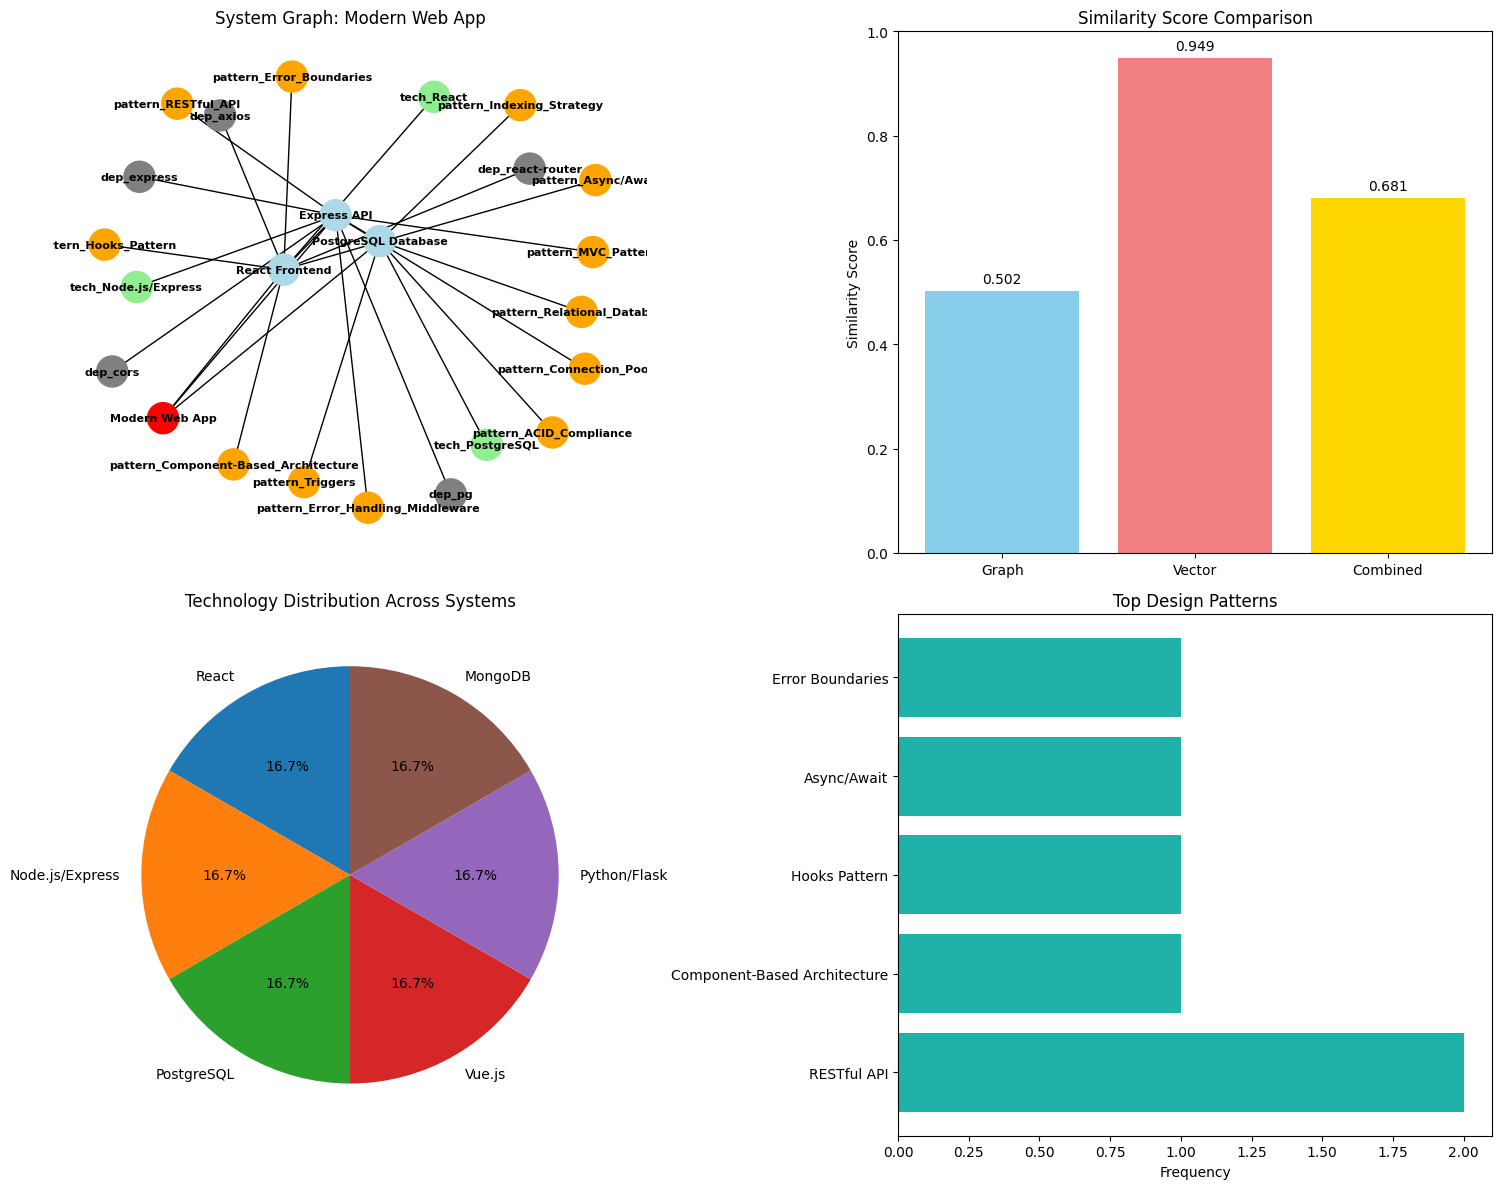


SYSTEM DESIGN SIMILARITY ANALYSIS REPORT

📋 System 1: Modern Web App
   Description: React frontend with Node.js API and PostgreSQL database
   Components: 3
   Tech Stack: React, Node.js/Express, PostgreSQL, Docker
   Graph Metrics: 24 nodes, 25 edges
   Vector Dimensions: 420

📋 System 2: Microservices Web App
   Description: Vue.js frontend with Python Flask microservices and MongoDB
   Components: 3
   Tech Stack: Vue.js, Python/Flask, MongoDB, Kubernetes
   Graph Metrics: 25 nodes, 26 edges
   Vector Dimensions: 420

🔗 Similarity Analysis Results:

   Modern Web App ↔ Microservices Web App
   Combined Score: 0.681
   High Similarity - Similar approaches with minor differences

📊 Analysis Complete!
   Systems Analyzed: 2
   Similarity Comparisons: 1
   Graph Representations: ✅
   Vector Representations: ✅
   NLP-based Feature Extraction: ✅


In [9]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. System Architecture Graph Visualization
if len(system_graphs) >= 1:
    ax1 = axes[0, 0]
    G = system_graphs[0]  # Visualize first system
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Color nodes by type
    node_colors = []
    for node, data in G.nodes(data=True):
        node_type = data.get('type', 'unknown')
        if node_type == 'system':
            node_colors.append('red')
        elif node_type == 'component':
            node_colors.append('lightblue')
        elif node_type == 'technology':
            node_colors.append('lightgreen')
        elif node_type == 'pattern':
            node_colors.append('orange')
        else:
            node_colors.append('gray')
    
    nx.draw(G, pos, ax=ax1, node_color=node_colors, with_labels=True, 
            node_size=500, font_size=8, font_weight='bold')
    ax1.set_title(f"System Graph: {mock_systems[0].name}")

# 2. Similarity Score Comparison
if similarity_results:
    ax2 = axes[0, 1]
    
    # Create comparison data
    methods = ['Graph', 'Vector', 'Combined']
    scores = [
        similarity_results[0]['graph_similarity']['overall'],
        similarity_results[0]['vector_similarity']['overall'],
        similarity_results[0]['combined_score']
    ]
    
    bars = ax2.bar(methods, scores, color=['skyblue', 'lightcoral', 'gold'])
    ax2.set_title('Similarity Score Comparison')
    ax2.set_ylabel('Similarity Score')
    ax2.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{score:.3f}', ha='center', va='bottom')

# 3. Technology Distribution
ax3 = axes[1, 0]
tech_counts = {}
for system in mock_systems:
    for component in system.components:
        tech = component.technology
        tech_counts[tech] = tech_counts.get(tech, 0) + 1

techs = list(tech_counts.keys())
counts = list(tech_counts.values())

ax3.pie(counts, labels=techs, autopct='%1.1f%%', startangle=90)
ax3.set_title('Technology Distribution Across Systems')

# 4. Pattern Analysis
ax4 = axes[1, 1]
pattern_counts = {}
for system in mock_systems:
    for component in system.components:
        for pattern in component.patterns:
            pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

# Get top 5 patterns
top_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)[:5]
patterns, p_counts = zip(*top_patterns) if top_patterns else ([], [])

if patterns:
    ax4.barh(patterns, p_counts, color='lightseagreen')
    ax4.set_title('Top Design Patterns')
    ax4.set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# Summary Report
print("\n" + "="*60)
print("SYSTEM DESIGN SIMILARITY ANALYSIS REPORT")
print("="*60)

for i, system in enumerate(mock_systems):
    print(f"\n📋 System {i+1}: {system.name}")
    print(f"   Description: {system.description}")
    print(f"   Components: {len(system.components)}")
    print(f"   Tech Stack: {', '.join(system.tech_stack.values())}")
    print(f"   Graph Metrics: {graph_metrics[i]['nodes']} nodes, {graph_metrics[i]['edges']} edges")
    print(f"   Vector Dimensions: {len(system_vectors[i])}")

if similarity_results:
    print(f"\n🔗 Similarity Analysis Results:")
    for result in similarity_results:
        print(f"\n   {result['systems'][0]} ↔ {result['systems'][1]}")
        print(f"   Combined Score: {result['combined_score']:.3f}")
        print(f"   {result['interpretation']}")

print(f"\n📊 Analysis Complete!")
print(f"   Systems Analyzed: {len(mock_systems)}")
print(f"   Similarity Comparisons: {len(similarity_results)}")
print(f"   Graph Representations: ✅")
print(f"   Vector Representations: ✅")
print(f"   NLP-based Feature Extraction: ✅")
